## Figure of bathymetry and CS definitions

In [2]:
from brokenaxes import brokenaxes
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.gridspec as gspec
import matplotlib as mpl
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import seaborn as sns
import xarray as xr
import canyon_tools.readout_tools as rout
import canyon_tools.savitzky_golay as sg

import warnings
warnings.filterwarnings('ignore')

In [3]:
def plotCSPos(ax,CS1,CS2,CS3,CS4,CS5,LID):
    ax.axvline(x=CS1, ymin=1., ymax=0.75, color='0.95',linestyle='-')
    ax.axvline(x=CS2, ymin=1., ymax=0.75,color='0.95',linestyle='-')
    ax.axvline(x=CS3, ymin=1., ymax=0.75,color='0.95',linestyle='-')
    ax.axvline(x=CS4, ymin=1., ymax=0.75,color='0.95',linestyle='-')
    ax.axvline(x=CS5, ymin=1., ymax=0.75,color='0.95',linestyle='-')
    ax.axhline(y=LID, xmin=0., xmax=1,color='0.95',linestyle='-')


def plotPoolArea(ax,xx,yy):
    #ax.plot(xx[1,:],yy[1,:],'--k')
    ax.plot(xx[:,1],yy[:,1],':r')
    ax.plot(xx[-1,:],yy[-1,:],':r')
    ax.plot(xx[:,-1],yy[:,-1],':r')

def plotCSLines(ax,xx,yy,CS1x,CS2x,CS3x,CS4x):
    ax.plot(xx[227,slice(0,CS1x)],yy[227,slice(0,CS1x)],'-',color='0.5',linewidth=3)
    ax.plot(xx[227,slice(CS1x,CS2x)],yy[227,slice(CS1x,CS2x)],'-k',linewidth=3)
    ax.plot(xx[227,slice(CS2x,CS3x)],yy[227,slice(CS2x,CS3x)],'-',color='0.5',linewidth=3)
    ax.plot(xx[227,slice(CS3x,CS4x)],yy[227,slice(CS3x,CS4x)],'-k',linewidth=3)
    ax.plot(xx[227,slice(CS4x,360)],yy[227,slice(CS4x,360)],'-',color='0.5',linewidth=3)
    

In [4]:
# Cross-shelf 
def Plot1_crossshelf(gs_ax,YY,RC, HFacC,depths,zslice,yslice,xind_shelf=100,xind_axis=180,color='black', color_bg='0.7'): 
    
    ax = plt.subplot(gs_ax)
    
    ax.plot(YY/1000,depths[yslice,xind_shelf],
            '--',
            color=color,
            linewidth=2,
                )
    ax.plot(YY[yslice]/1000,depths[yslice,xind_axis],
            '-',
            color=color,
            linewidth=2,
            )
    ax.contourf(YY[yslice]/1000,RC[zslice],HFacC[zslice,yslice,xind_axis],[0,0.5,1],colors=[color_bg,'1','1'])
    #ax.axvline(x=grid.Y[227]/1000, linestyle=':',color='k')
    #ax.axhline(y=grid.Z[29], linestyle=':',color='k')
   
    return ax

In [5]:
# Alongshelf
def Plot2_alongshelf(gs_ax,depths,zslice,xslice,yind=227,color='black'): 
    
    ax = plt.subplot(gs_ax)
    
    plotCSPos(ax,grid.XC[1,60]/1000,grid.XC[1,120]/1000,grid.XC[1,240]/1000,grid.XC[1,300]/1000,
              grid.XC[1,360]/1000,grid.Z[29])
    ax.plot(grid.X[xslice]/1000,depths[yind,xslice],
            '-',
            color=color,
            linewidth=2,
                )
    ax.plot(grid.X[xslice]/1000,depths[yind,xslice],
            '--',
            color=color,
            linewidth=2,
            )
    ax.contourf(grid.X[xslice]/1000,grid.RC[zslice],grid.HFacC[zslice,yind,xslice],[0,0.5,1],colors=['0.7','1','1'])
    #ax.axhline(y=grid.Z[29], linestyle=':',color='k')
    
    return ax

In [207]:
# Top view
def Plot3_topview(gs_ax,depths,xslice,yslice,color='black', clabels=True, colors='0.8'): 
    
    ax = plt.subplot(gs_ax)
    
    #plotPoolArea(ax,grid.XC[slice(227,315),slice(120,463)]/1000,grid.YC[slice(227,315),slice(120,463)]/1000)
    ax.contour(grid.X[xslice]/1000,grid.Y[yslice]/1000,depths[yslice,xslice],[147.5],
               colors=['k'])
    CS=ax.contour(grid.X[xslice]/1000,grid.Y[yslice]/1000,depths[yslice,xslice],[20,100,200,400,600,800,1000,1200],
               colors=colors)
    if clabels == True:
        plt.clabel(CS, fontsize=9,inline=1,inline_spacing=1,
                   fmt = '%1.0f', ticks=[400,600,800,1000])
    
    return ax


# Top view
def top_zoom(gs_ax,XX,YY,depths,xslice,yslice,Hs,levels,color='black'): 
    
    ax = plt.subplot(gs_ax)
    
    CS1 = ax.contour(XX[xslice]/1000,YY[yslice]/1000,depths[yslice,xslice],
                    levels,
                    colors=['coral'])
    
    CS2 = ax.contour(XX[xslice]/1000,YY[yslice]/1000,depths[yslice,xslice],
                    [Hs],
                    colors=['k'])
    
    manual_locations = [(72.5,60),(72.5,56),(72.5,52)]
    #plt.clabel(CS1,levels,fontsize=9,inline=True,inline_spacing=1,
    #           manual=manual_locations,
    #           fmt = '%1.0f' )
    return ax

def top_zoom_filled(gs_ax,XX,YY,depths,xslice,yslice,Hs,levels,color='black'): 
    
    ax = plt.subplot(gs_ax)
    
    CS1 = ax.contourf(XX[xslice]/1000,YY[yslice]/1000,depths[yslice,xslice],
                    levels,
                    cmap=cmo.cm.rain)
    
    cbar_ax = f.add_axes([0.9, 0.545, 0.018, 0.332])
    cb=f.colorbar(CS1, cax=cbar_ax)
    cb.ax.yaxis.set_tick_params(pad=2)
    cb.set_label('Depth / m')
    CS2 = ax.contour(XX[xslice]/1000,YY[yslice]/1000,depths[yslice,xslice],
                    [Hs],
                    colors=['k'])
    
    return ax

In [123]:
# Plot Kv profiles
def Plot_kv(gs_ax, dep, colors, labels): 
    ax = plt.subplot(gs_ax)
    ax.axhline(dep[22],linestyle=':',color='r',linewidth=2)

    profiles = get_profiles()   
    sns.set_palette("Purples_r")
    for ii, col, lab in zip(range(len(profiles)),colors, labels):
        ax.plot(profiles[ii,:48], 
                dep[:48], 
                label=lab)
    return ax
def get_profiles():
    kv_dir = '/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/'
    ini_kv_files = [kv_dir + 'KrDiff_e05_exact_nosmooth_90zlev_616x360_Quad.bin',
                    kv_dir + 'KrDiff_e10_kv1E2_90zlev_616x360_Quad.bin',
                    kv_dir + 'KrDiff_e25_kv1E2_90zlev_616x360_Quad.bin',
                    kv_dir + 'KrDiff_e50_kv1E2_90zlev_616x360_Quad.bin',
                    kv_dir + 'KrDiff_e100_kv1E2_90zlev_616x360_Quad.bin',
                    ]

    dt = np.dtype('>f8')  # float 64 big endian
    DnC = [261, 180] # y, x indices of DnS station

    ini_kv_profiles = np.zeros((len(ini_kv_files),nz))

    for file, ii in zip(ini_kv_files, range(len(ini_kv_files))):
        data = np.fromfile(file, dt)
        ini_kv = np.reshape(data,(nz,ny,nx),order='C')
        ini_kv_profiles[ii,:] = ini_kv[:, DnC[0], DnC[1]] 
    
    return ini_kv_profiles

In [65]:
# Plot T, S, Tr profiles
def Plot_tracers(ax0,ax1,state_file, color, label): 
    state = xr.open_dataset(state_file)
    dep = state.Z[:]
    T = state.Temp[0,:-3,50,180]
    S = state.S[0,:-3,50,180]
    
    ax0.axhline(dep[29],linestyle=':',color='k',linewidth=2)
    ax0.axhline(dep[39],linestyle=':',color='0.5',linewidth=2)
    
    ax1.axhline(dep[29],linestyle=':',color='k',linewidth=2)
    ax1.axhline(dep[39],linestyle=':',color='0.5',linewidth=2)
    
    ax0.plot(T[:], dep[:-3], color=color, label=label)
    ax1.plot(S[:], dep[:-3], color=color, label=label)
    

In [58]:
# Grid, state and tracers datasets of base case
grid_file1 = '/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/gridGlob.nc'
grid = xr.open_dataset(grid_file1)

# Grid, state and tracers datasets of base case
grid_file2 = '/data/kramosmu/results/TracerExperiments/UPW_10TR_BF4_BAR/01_Bar03/gridGlob.nc'
gridBar = xr.open_dataset(grid_file2)

state_ast = '/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/stateGlob.nc'
state_argo = '/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/03_Ast03_Argo/stateGlob.nc'
state_bar = '/data/kramosmu/results/TracerExperiments/UPW_10TR_BF4_BAR/01_Bar03/stateGlob.nc'
state_path = '/data/kramosmu/results/TracerExperiments/UPW_10TR_BF4_BAR/03_Bar03_Path/stateGlob.nc'


In [12]:
# General input
nx = 616
ny = 360
nz = 90
nt = 19 # t dimension size 

xslice=slice(100,360)
yslice=slice(120,310)

tslice = slice(8,16)

xind = 240
yind = 227 # y index for alongshore cross-section
zind = 27

hFacmaskedAst = np.ma.masked_values(grid.HFacC.data, 0)
MaskCAst = np.ma.getmask(hFacmaskedAst)

hFacmaskedBar = np.ma.masked_values(gridBar.HFacC.data, 0)
MaskCBar = np.ma.getmask(hFacmaskedBar)

print(grid.X[615]/1000)

<xarray.DataArray 'X' ()>
array(280.91896454)
Coordinates:
    X        float64 2.809e+05


In [39]:
zslice = slice(0,90)
yslice = slice(0,360)
xslice = slice(0,616)

xslice2 = slice(0,616)
zslice2 = slice(0,57)

# Top view, zoom
xslice4 = slice(90,270)
yslice4 = slice(115,275)

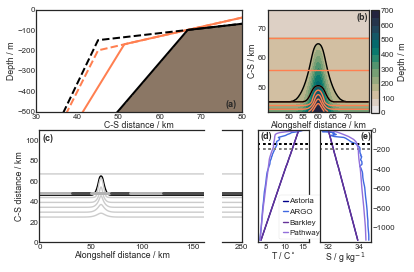

In [223]:
sns.set_style('white')
sns.set_context('paper')
plt.rcParams['font.size'] = 10.0
f = plt.figure(figsize = (6,4.28)) 

gs = gspec.GridSpec(2, 1, height_ratios=[1,1.1], hspace=0.17)
gs0 = gspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[0],width_ratios=[1.166,0.6], wspace=0.15)
gs1 = gspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gs[1],width_ratios=[1, 0.166,0.3,0.3], wspace=0.15)
ax4 = plt.subplot(gs1[2])
ax5 = plt.subplot(gs1[3])

# C-S slice
ax2 = Plot1_crossshelf(gs0[0],gridBar.Y, gridBar.RC, gridBar.HFacC,-gridBar.Depth,zslice,yslice,
                       xind_shelf=100,xind_axis=180,color='coral', color_bg='#8b7765')
ax2 = Plot1_crossshelf(gs0[0],grid.Y, grid.RC, grid.HFacC,-grid.Depth,zslice,yslice,
                       xind_shelf=100,xind_axis=180,color='black', color_bg='#8b7765')

ax2.set_ylim(-500,0)
ax2.set_xlim(30,80)

# Top view
ax3 = Plot3_topview(gs1[0],grid.Depth,xslice,yslice, clabels=False)
ax6 = Plot3_topview(gs1[1],grid.Depth,xslice,yslice, clabels=False)
xlim_ax3 = 160000
xlim_ax6 = 281000
min_xlim_ax6 = 261000
ax3.axhline(y=48,xmin=0, xmax=(grid.X[60]/xlim_ax3), linewidth=3, color='0.7')
ax3.axhline(y=48,xmin=(grid.X[60]/xlim_ax3), xmax=(grid.X[120]/xlim_ax3),
            linewidth=3, color='0.3')
ax3.axhline(y=48,xmin=(grid.X[120]/xlim_ax3), xmax=(grid.X[240]/xlim_ax3),
            linewidth=3, color='0.7')
ax3.axhline(y=48,xmin=(grid.X[240]/xlim_ax3), xmax=(grid.X[300]/xlim_ax3),
            linewidth=3, color='0.3')
ax3.axhline(y=48,xmin=(grid.X[300]/xlim_ax3), xmax=(grid.X[360]/xlim_ax3),
            linewidth=3, color='0.7')
ax3.axhline(y=48,xmin=(grid.X[360]/xlim_ax3), xmax=(grid.X[615]/xlim_ax3),
            linewidth=3, color='0.3')

ax6.axhline(y=48,xmin=0, xmax=1,
            linewidth=3, color='0.3')
ax3.set_xlim(0,xlim_ax3/1000)
ax6.set_xlim(261,xlim_ax6/1000)
ax3.set_aspect(1)
ax6.set_aspect(1)
ax3.spines['right'].set_visible(False)
ax6.spines['left'].set_visible(False)
ax3.yaxis.tick_left()
ax3.tick_params(labelright='off')
ax6.set_yticks([40])
ax6.set_yticklabels([''])
ax6.set_xticks([280])

#Zoom, top view
ax1 = top_zoom_filled(gs0[1],grid.X, grid.Y,grid.Depth,xslice4,yslice4,150,
                      [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700])
ax1 = top_zoom(gs0[1],gridBar.X, gridBar.Y,gridBar.Depth,xslice4,yslice4,200,[100,150,200,250,300,350,400])

ax1.set_xticks([45,50,55,60,65,70,75])
ax1.set_xticklabels(['','50','55','60','65','70',''])
ax1.set_aspect('equal')

ax1.tick_params(axis='x', pad=2)
ax2.tick_params(axis='x', pad=2)
ax3.tick_params(axis='x', pad=2)
ax4.tick_params(axis='x', pad=2)
ax5.tick_params(axis='x', pad=2)
ax6.tick_params(axis='x', pad=2)

ax1.tick_params(axis='y', pad=1)
ax2.tick_params(axis='y', pad=1)
ax3.tick_params(axis='y', pad=1)
ax4.tick_params(axis='y', pad=1)
ax5.tick_params(axis='y', pad=1)
ax6.tick_params(axis='y', pad=1)


ax2.set_xlabel('C-S distance / km',labelpad=1)
ax2.set_ylabel('Depth / m',labelpad=1)

ax1.set_xlabel('Alongshelf distance / km',labelpad=1,)
ax3.set_xlabel('Alongshelf distance / km',labelpad=1)

ax1.set_ylabel('C-S / km',labelpad=1)
ax3.set_ylabel('C-S distance / km',labelpad=1)


colors = ['darkblue', 'royalblue', 'rebeccapurple','mediumpurple']
labels = ['Astoria', 'ARGO', 'Barkley', 'Pathway']
for file, col, lab in zip([state_ast,state_argo, state_bar, state_path], colors, labels):
    Plot_tracers(ax4,ax5,file,col, lab)
ax4.set_ylim(grid.Z[-3],0)
ax5.set_ylim(grid.Z[-3],0)
ax4.legend(bbox_to_anchor=(0.35,0.46), handlelength=0.7, handletextpad=0.1, frameon=True, facecolor='w', framealpha=1)
ax5.set_xlabel('S / g kg$^{-1}$', labelpad=0)
ax4.set_xlabel('T / C$^{\circ}$', labelpad=0)
ax4.set_yticks([])
ax5.yaxis.tick_right()
ax5.yaxis.set_label_position("right")

ax1.text(0.88,0.9,'(b)',fontsize=9,transform=ax1.transAxes, fontweight='bold')
ax2.text(0.92,0.05,'(a)',transform=ax2.transAxes,fontsize=9,fontweight='bold')
ax3.text(0.02,0.9,'(c)',fontsize=9,transform=ax3.transAxes,fontweight='bold')
ax4.text(0.05,0.92,'(d)',transform=ax4.transAxes,fontsize=9,fontweight='bold')
ax5.text(0.8,0.92,'(e)',transform=ax5.transAxes,fontsize=9, fontweight='bold')

plt.savefig('fig_bathy.pdf',format='pdf',bbox_inches='tight')


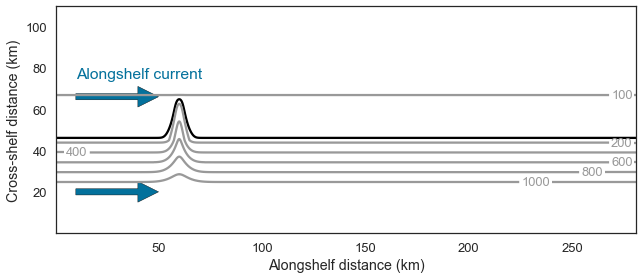

In [46]:
sns.set_context('talk')
sns.set_style('white')

    
fig, ax = plt.subplots(1,1)
    
ax.contour(grid.X[xslice]/1000,grid.Y[yslice]/1000,grid.Depth[yslice,xslice],[147.5],
           colors=['k'])
CS=ax.contour(grid.X[xslice]/1000,grid.Y[yslice]/1000,grid.Depth[yslice,xslice],[20,100,200,400,600,800,1000,1200],
              colors=['0.6','0.6','0.6','0.6','0.6','0.6','0.6','0.6'])
#plt.clabel(CS, fontsize=9,inline=1,inline_spacing=1,manual=[[250,70],[20,60],[250,45]],
#           fmt = '%1.0f', ticks=[20,100,200])
plt.clabel(CS, fontsize=13,inline=1,inline_spacing=1,
           fmt = '%1.0f', ticks=[400,600,800,1000])


ax.arrow(10, 66, 30, 0 , width = 3, head_width=10, head_length=10, fc=sns.xkcd_rgb['ocean blue'], ec='k')
ax.arrow(10, 20, 30, 0 , width = 3, head_width=10, head_length=10, fc=sns.xkcd_rgb['ocean blue'], ec='k')
ax.text(10,75,'Alongshelf current',color=sns.xkcd_rgb['ocean blue'] )
ax.set_aspect(1)
ax.set_ylabel('Cross-shelf distance (km)')    
ax.set_xlabel('Alongshelf distance (km)')    

plt.savefig('bathy_pres.eps',format='eps',bbox_inches='tight')


In [201]:
7/5

1.4

In [202]:
6/1.4

4.285714285714286